In [1]:
import numpy as np
import matplotlib.pyplot as plt
from global_land_mask import globe
import cartopy.crs as ccrs
import xarray as xr
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600

In [2]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/ERA Prec, Pwat all region.nc'
ds = xr.open_dataset(a)

In [3]:
jjas = ds.time.dt.month.isin(range(6, 10))
clim = ds.sel(time=jjas) #ds with only JJAS months

#prec = 86400*clim.mtpr.sel(time='2020').mean(dim='time')
prec1 = 86400*clim.mtpr.mean(dim='time')

In [ ]:
djfm= ds.time.dt.month.isin([1, 2, 3, 12])
clim2 = ds.sel(time=djfm) #ds with only DJFM months

prec2 = 86400*clim2.mtpr.mean(dim='time')

In [7]:
set1 = [prec1, prec2]

In [ ]:
fig = plt.figure()
ax2 = fig.add_axes([0.9, 0.1, 0.05, 0.9])
fig.colorbar(z1, cax=ax2) #specifies to put the colorbar in ax2

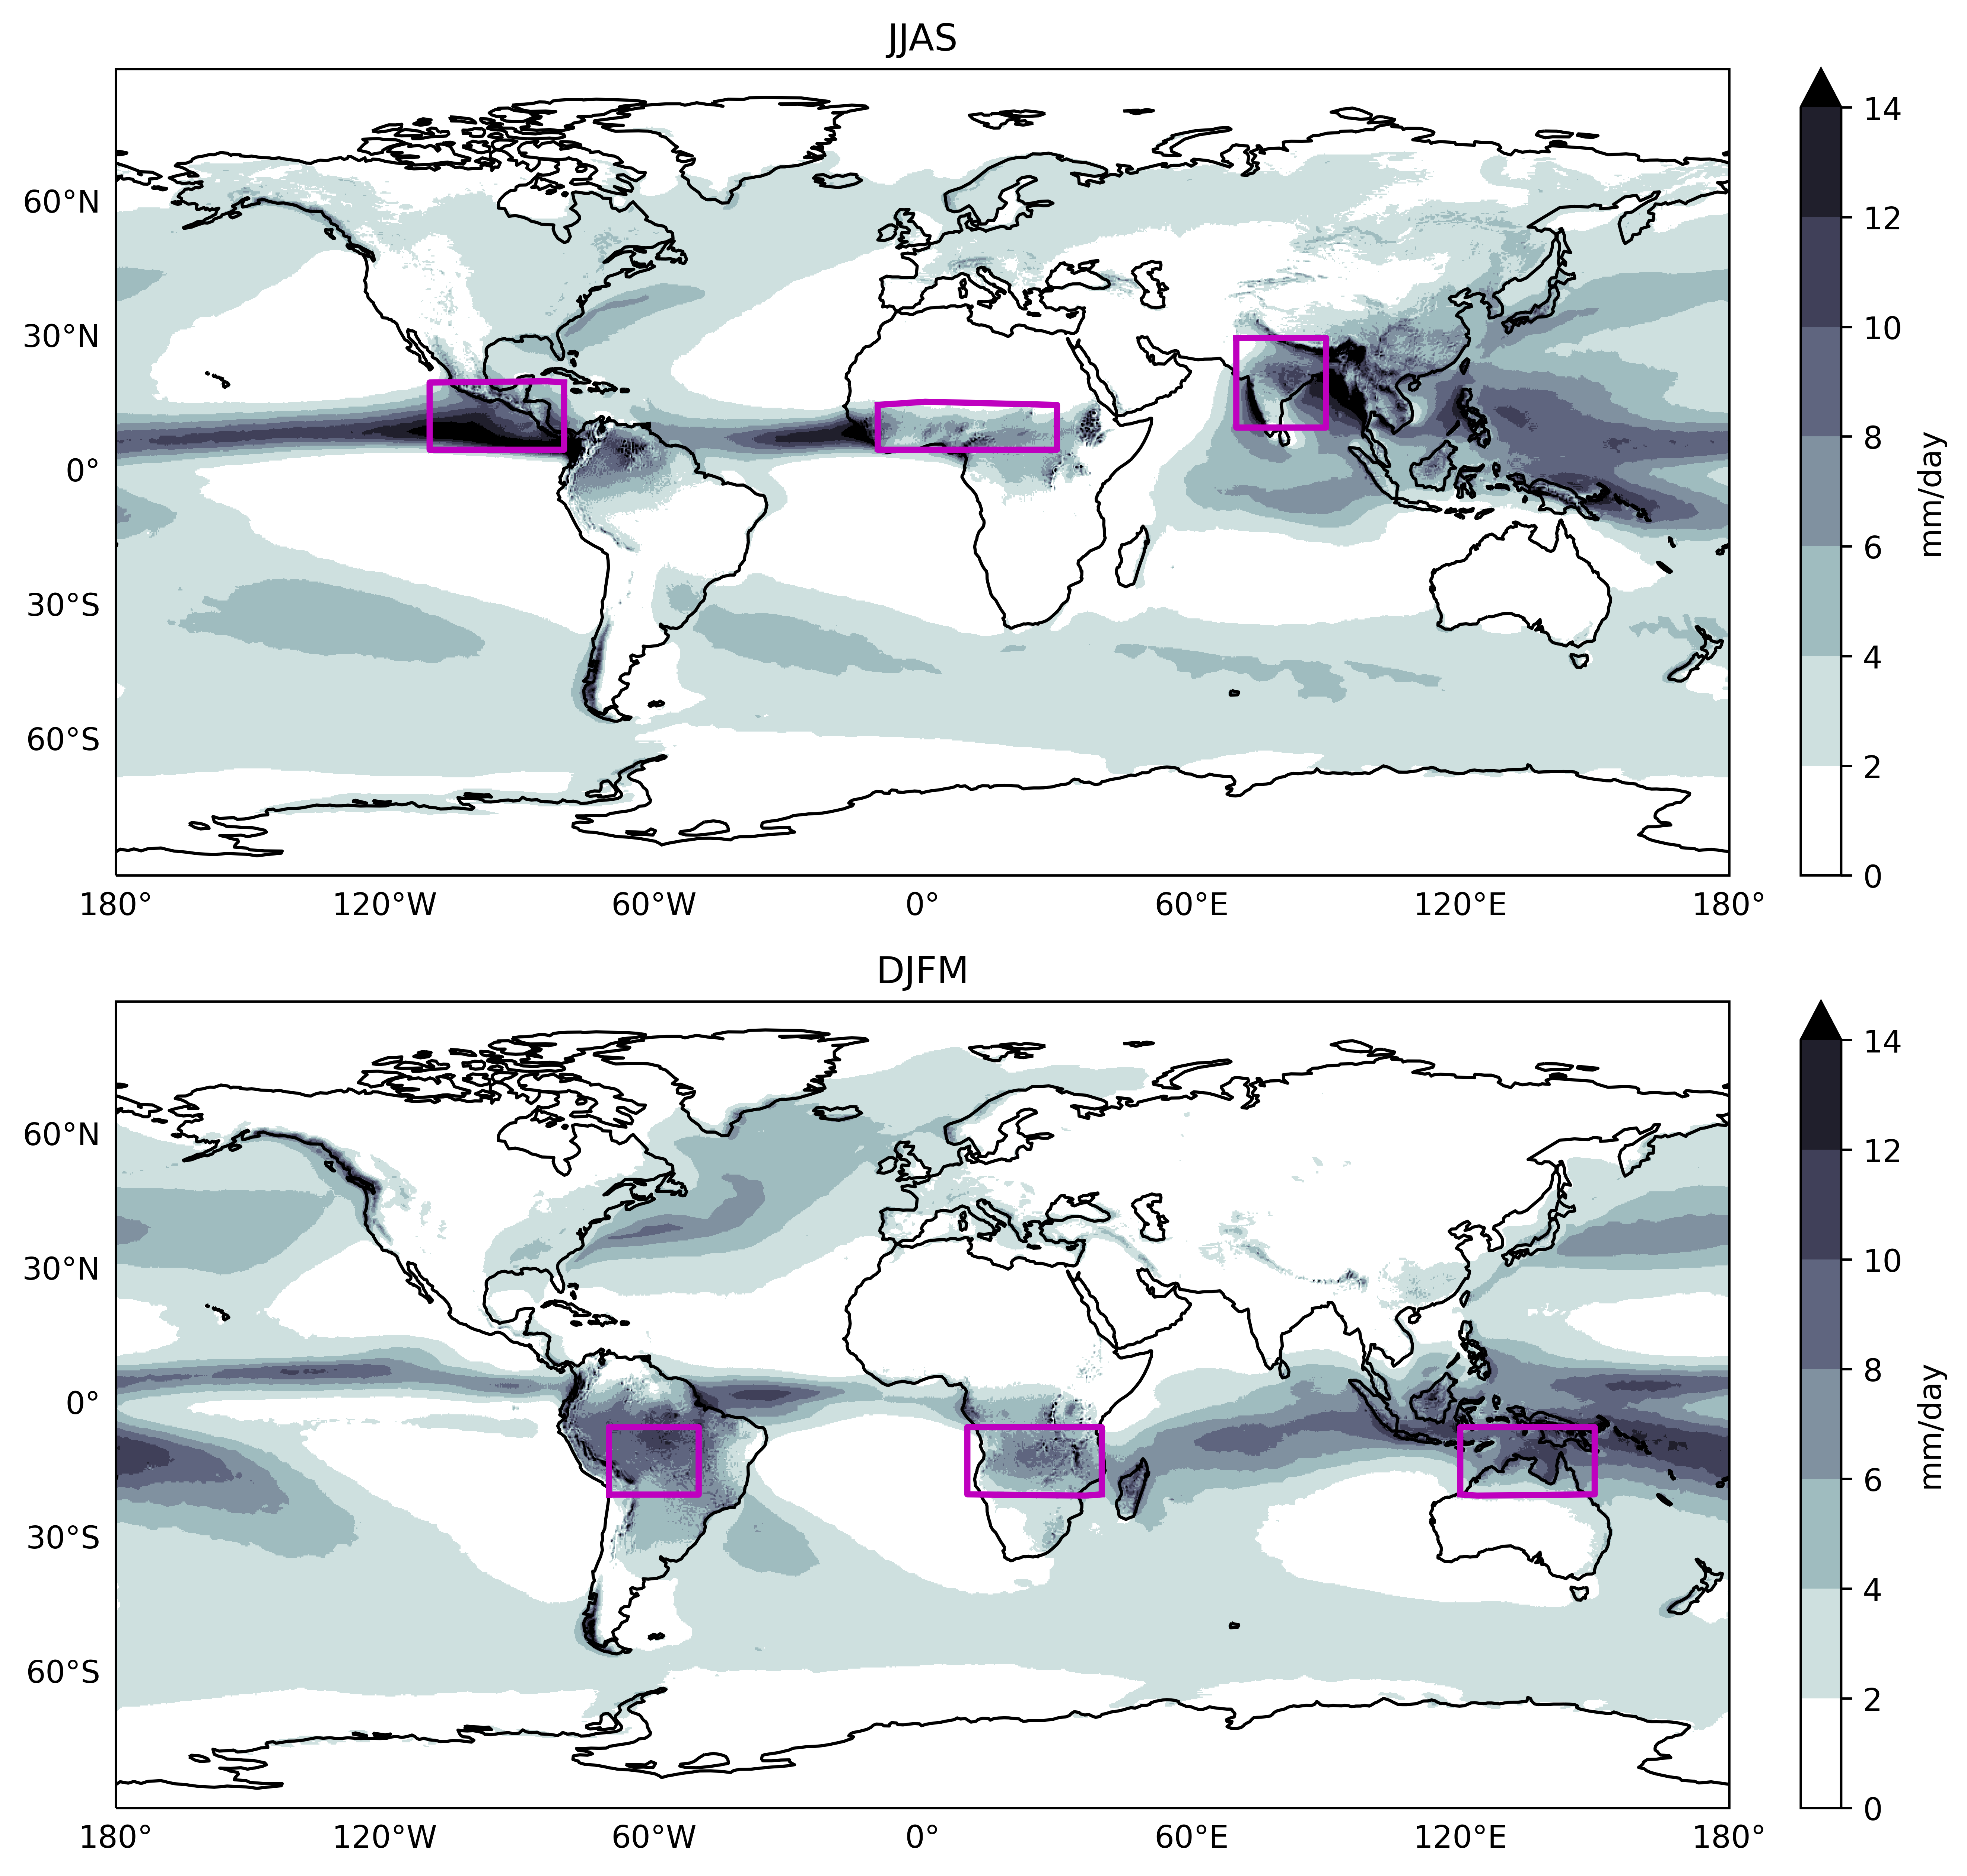

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

axs=axs.flatten()

for i, models in zip([0,1], set1):
    gls = axs[i].gridlines(draw_labels=True, color='none') #color='none' makes gridlines invisible
    gls.top_labels=False   # suppress top labels
    gls.right_labels=False # suppress right labels
    
    if i==0:
        cs = models.plot(ax=axs[i], transform=ccrs.PlateCarree(), cmap='bone_r', levels=8, vmin=0, vmax=14, cbar_kwargs={'orientation': 'vertical', 'pad':0.03, 'label':'mm/day'})
        axs[i].plot([70, 70, 90, 90, 70], [30, 10, 10, 30, 30],'m',linewidth=2,transform=ccrs.Geodetic()) #India
        axs[i].plot([280, 280, 250, 250, 280], [20, 5, 5, 20, 20],'m',linewidth=2,transform=ccrs.Geodetic()) #North American
        axs[i].plot([350, 350, 30, 30, 350], [15, 5, 5, 15, 15],'m',linewidth=2,transform=ccrs.Geodetic()) #North Africa
        axs[i].set_title('JJAS')
    else:
        cs = models.plot(ax=axs[i], transform=ccrs.PlateCarree(), cmap='bone_r', levels=8, vmin=0, vmax=14, cbar_kwargs={'orientation': 'vertical', 'pad':0.03, 'label':'mm/day'})
        axs[i].plot([290, 290, 310, 310, 290], [-20, -5, -5, -20, -20],'m',linewidth=2,transform=ccrs.Geodetic()) #South America
        axs[i].plot([40, 40, 10, 10, 40], [-20, -5, -5, -20, -20],'m',linewidth=2,transform=ccrs.Geodetic()) #South Africa
        axs[i].plot([120, 120, 150, 150, 120], [-20, -5, -5, -20, -20],'m',linewidth=2,transform=ccrs.Geodetic()) #Australia
        axs[i].set_title('DJFM')
    axs[i].coastlines()

plt.tight_layout()

# Different kind of map

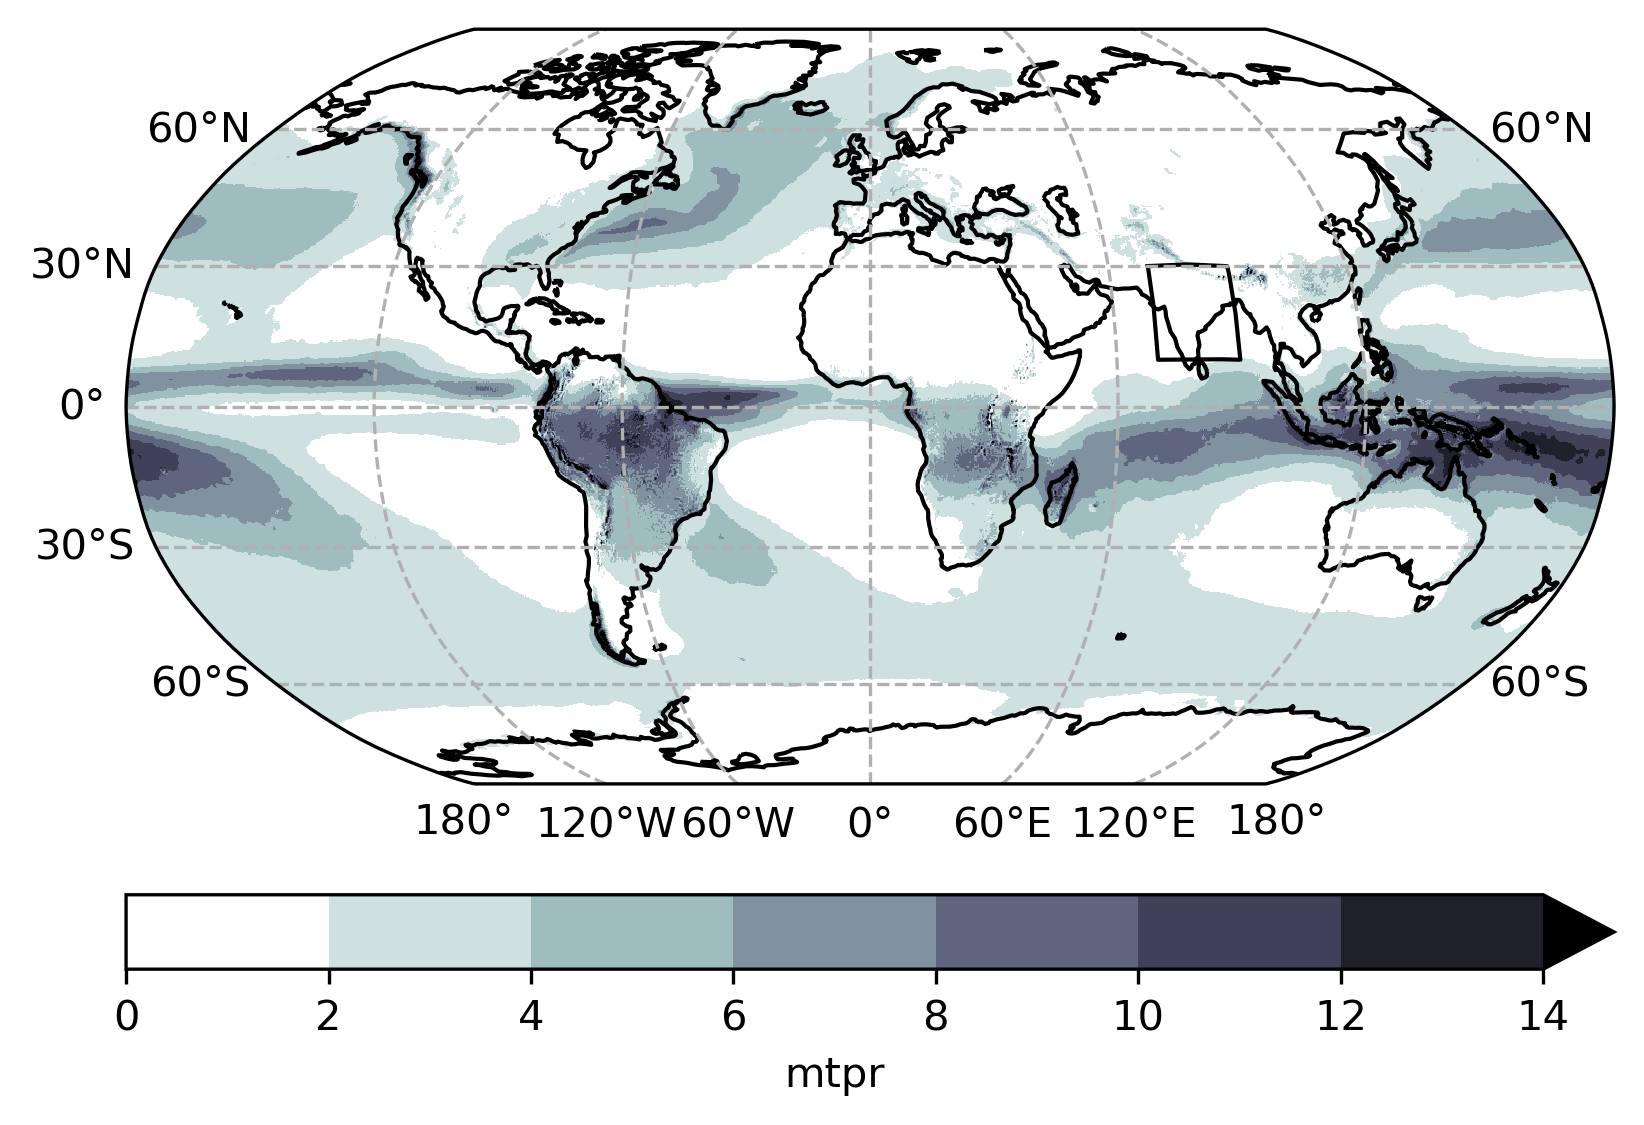

In [46]:
ax = plt.axes(projection=ccrs.Robinson())
gls = ax.gridlines(draw_labels=True, linestyle='--') #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
prec2.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='bone_r', levels=8, vmin=0, vmax=14, cbar_kwargs={'orientation': 'horizontal', 'pad':0.1})
ax.plot([70, 70, 90, 90, 70], [30, 10, 10, 30, 30],color='black', linewidth=1,transform=ccrs.Geodetic())

plt.show()

# Paper graph

In [2]:
model2 = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC-CM2-SR5/*.nc'
cmcc = xr.open_mfdataset(model2)

model3 = '/media/rakshith/Seagate Expansion Drive/Good models/INM-CM5-0/*.nc'
inm = xr.open_mfdataset(model3)

model4 = '/media/rakshith/Seagate Expansion Drive/Good models/MIROC6/*.nc'
miroc = xr.open_mfdataset(model4)

model7 = '/media/rakshith/Seagate Expansion Drive/Good models/E3SM-1-0/*.nc'
e3sm = xr.open_mfdataset(model7)

In [3]:
a = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/pr_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
b = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/pr_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'
c = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/prw_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
d = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/prw_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'
pr = [a,b]
prw = [c,d]
cesmpr = xr.open_mfdataset(pr)
cesmprw = xr.open_mfdataset(prw)
cesm = cesmpr.merge(cesmprw, compat='override')

model5 = '/media/rakshith/Seagate Expansion Drive/Good models/NESM3/*.nc'
nesm = xr.open_mfdataset(model5)

model6 = '/media/rakshith/Seagate Expansion Drive/Good models/BCC-CSM2-MR/*.nc'
bcc = xr.open_mfdataset(model6)

model8 = '/media/rakshith/Seagate Expansion Drive/Good models/GFDL-ESM4/*.nc'
gfdl = xr.open_mfdataset(model8)

model9 = '/media/rakshith/Seagate Expansion Drive/Good models/IPSL-CM6A-LR/*.nc'
ipsl = xr.open_mfdataset(model9)

model10 = '/media/rakshith/Seagate Expansion Drive/Good models/MRI-ESM2-0/*.nc'
mri = xr.open_mfdataset(model10)

model11 = '/media/rakshith/Seagate Expansion Drive/Good models/KACE-1-0-G/*.nc'
kace = xr.open_mfdataset(model11)

model12 = '/media/rakshith/Seagate Expansion Drive/Good models/E3SM-1-1-ECA/*.nc'
eca = xr.open_mfdataset(model12)

/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'prw' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
models = [cesm, cmcc, inm, miroc, nesm, bcc, e3sm, gfdl, ipsl, mri, kace, eca]
names = ['CESM-WACCM', 'CMCC-CM2-SR5', 'INM-CM5-0', 'MIROC6', 'NESM3', 'BCC-CSM2-MR', 'E3SM-1-0', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'KACE-1-0-G', 'E3SM-1-1-ECA']

In [5]:
lat1, lat2, lon1, lon2 = 10, 30, 70, 90
sPwat1=np.array([])
sPwat2=np.array([])
sPr1=np.array([])
sPr2=np.array([])
for i in models:
    #jjas = i.time.dt.month.isin(range(6, 10))
    #clim = i.sel(time=jjas) #ds with only JJAS months
    clim=i
    clim2 = clim.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))
    
    year1='1990'
    year2='2010'
    year3='2070'
    year4='2090'

    grid1 = clim2.sel(time=slice(year1, year2))
    grid2 = clim2.sel(time=slice(year3, year4))
    
    l=[]
    for i in grid1.lon:
        if i>180:
            l.append(i-360)
        else:
            l.append(i)
            
    lon_grid, lat_grid = np.meshgrid(l, grid1.lat)
    mask = globe.is_land(lat_grid, lon_grid)
    
    Pwat1 = grid1.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
    Pr1 = 86400*grid1.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
    Pwat2 = grid2.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
    Pr2 = 86400*grid2.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
    
    sPwat1 = np.append(sPwat1, Pwat1.values)
    sPwat2 = np.append(sPwat2, Pwat2.values)
    sPr1 = np.append(sPr1, Pr1.values)
    sPr2 = np.append(sPr2, Pr2.values)

In [6]:
from scipy.stats import binned_statistic
b = np.arange(0,81,5) #bin size specified here
bin_means1, bin_edges1, binnumber1 = binned_statistic(sPwat1, sPr1, statistic='mean', bins=b)
bin_means2, bin_edges2, binnumber2 = binned_statistic(sPwat2, sPr2, statistic='mean', bins=b)

#standard deviation values
std1, bin_edges1, binnumber1  = binned_statistic(sPwat1, sPr1, statistic='std', bins=b)
std2, bin_edges2, binnumber2  = binned_statistic(sPwat2, sPr2, statistic='std', bins=b)

X = (bin_edges1[0:-1]+bin_edges1[1:])*0.5 #x axis

In [7]:
PWAT1 = np.array([])
PREC1 = np.array([])
PWAT2 = np.array([])
PREC2 = np.array([])
for i in range(len(X)):
    if np.isnan(bin_means1[i])==False:
        PWAT1 = np.append(PWAT1, X[i])
        PREC1 = np.append(PREC1, bin_means1[i])
    if np.isnan(bin_means2[i])==False:
        PWAT2 = np.append(PWAT2, X[i])
        PREC2 = np.append(PREC2, bin_means2[i])    

In [8]:
data=inm #select model to compare
Name = 'INM-CM5-0'

In [9]:
#For JJAS
#jjas = data.time.dt.month.isin(range(6, 10))
#clim = data.sel(time=jjas) #ds with only JJAS months
#For all months
clim=data
clim2 = clim.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))

In [10]:
year1='1990'
year2='2010'
year3='2070'
year4='2090'
grid1 = clim2.sel(time=slice(year1, year2))
grid2 = clim2.sel(time=slice(year3, year4))

l=[]
for i in grid1.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, grid1.lat)
mask = globe.is_land(lat_grid, lon_grid)

In [11]:
Pwat1 = grid1.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pr1 = 86400*grid1.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pwat2 = grid2.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pr2 = 86400*grid2.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()

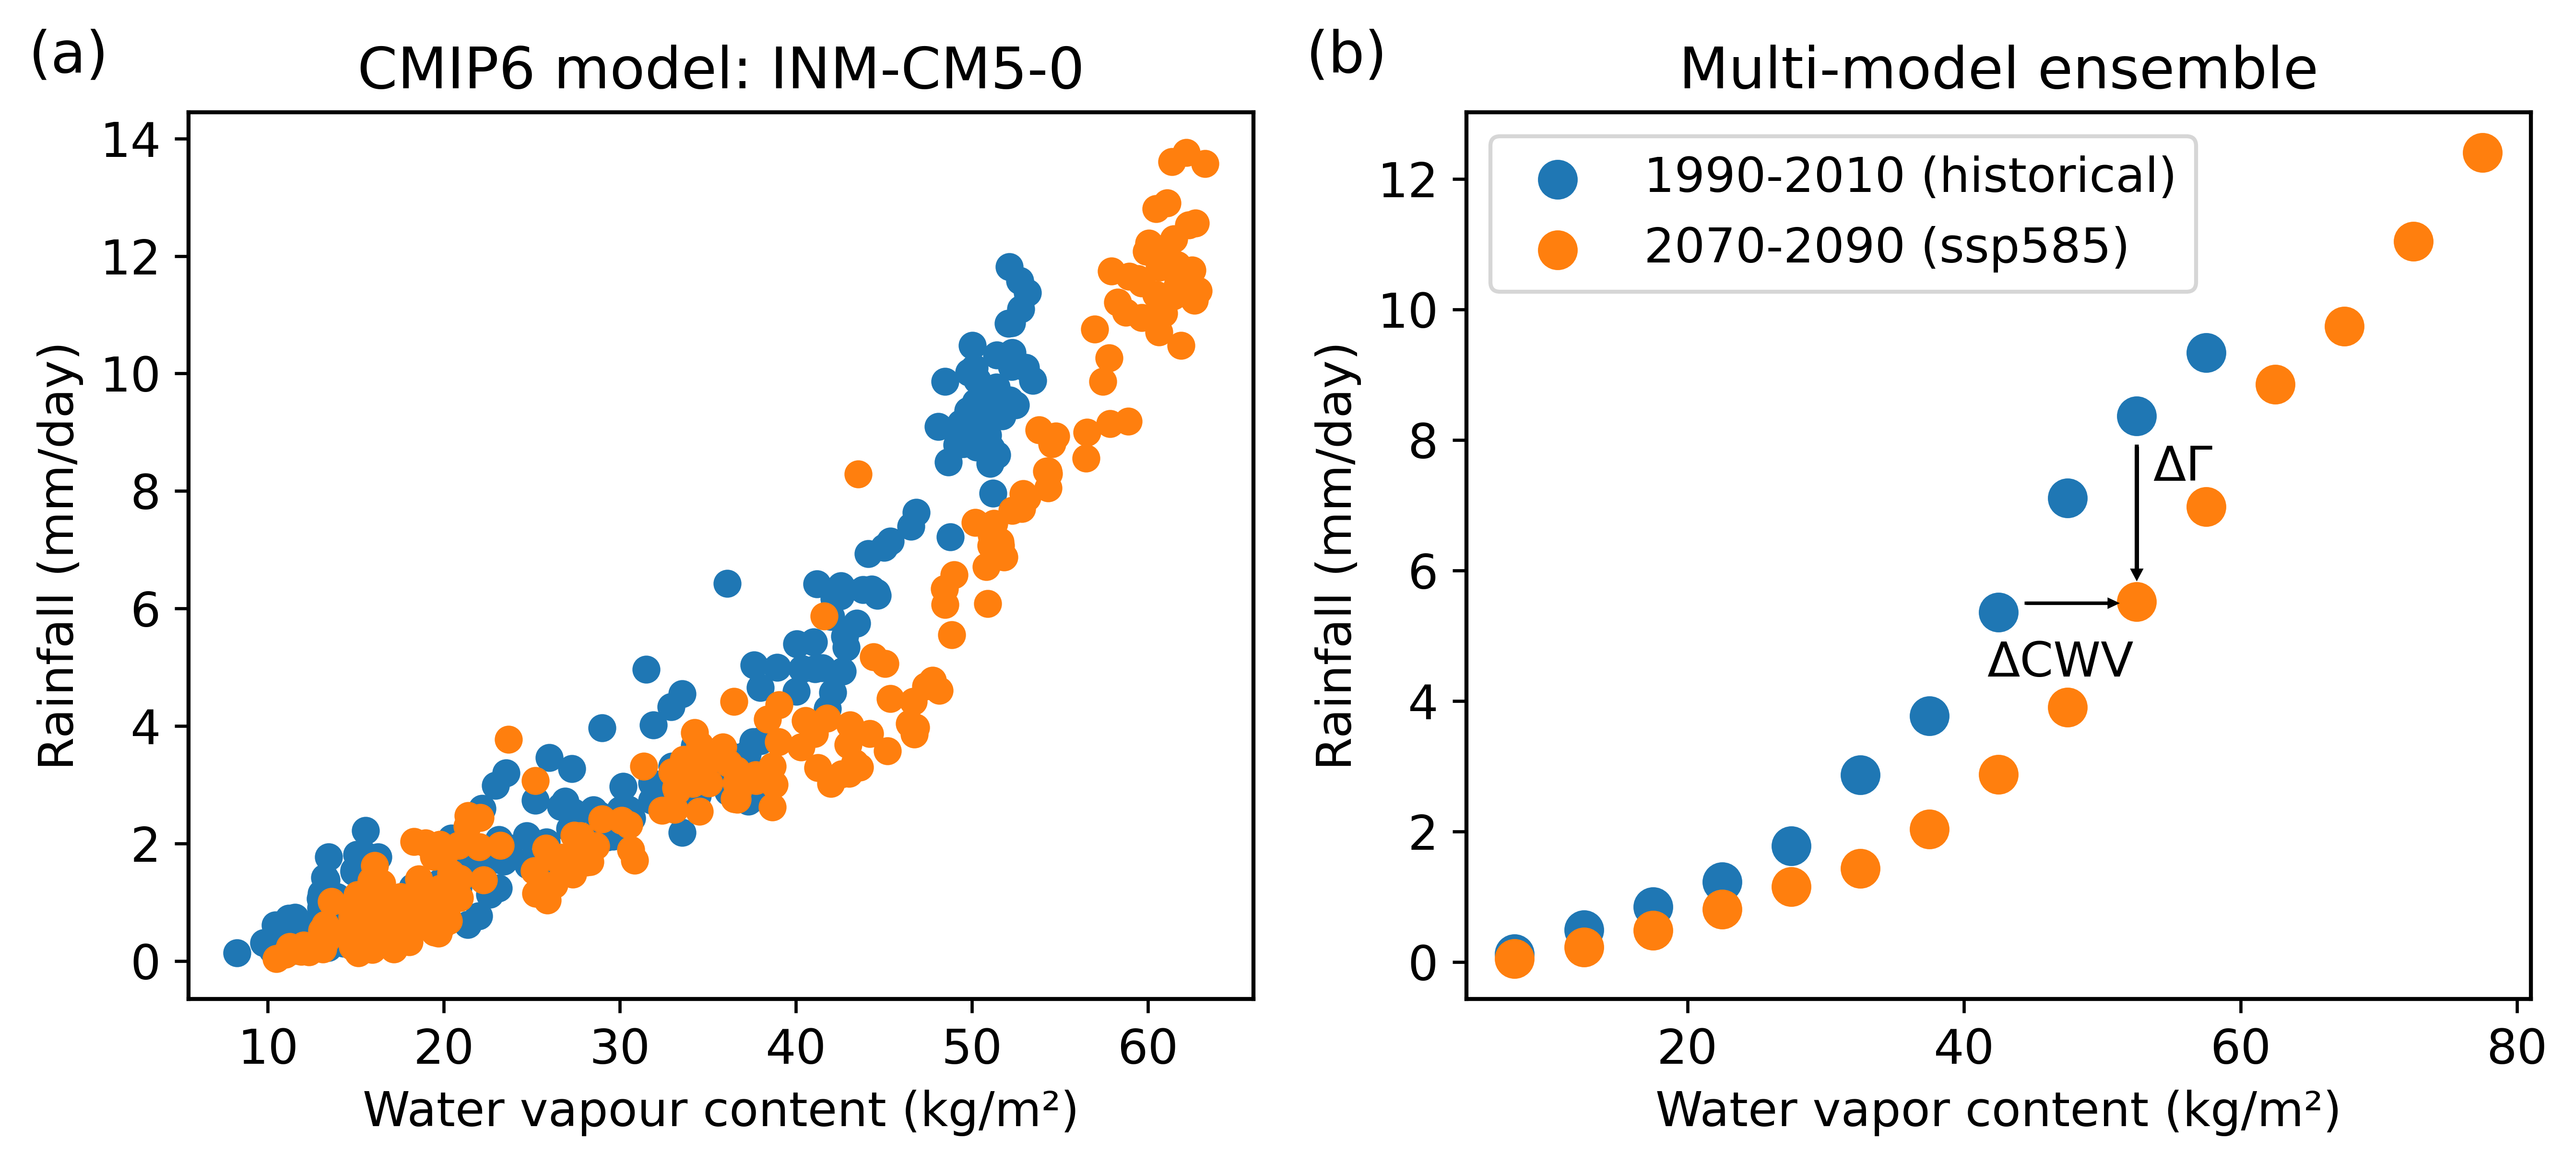

In [25]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [10.5,4]
mpl.rcParams['axes.linewidth'] = 1


fig, axes = plt.subplot_mosaic([['(a)', '(b)']])


axes['(a)'].scatter(Pwat1, Pr1, label=year1 + '-' + year2 + '\n(historical)')
axes['(a)'].scatter(Pwat2, Pr2, label=year3 + '-' + year4 + '\n(ssp585)')
axes['(a)'].set_xlabel('Water vapour content (kg/m\u00b2)')
axes['(a)'].set_ylabel('Rainfall (mm/day)')
axes['(a)'].set_title('CMIP6 model: ' + Name )

axes['(b)'].scatter(PWAT1, PREC1, s=80)
axes['(b)'].scatter(PWAT2, PREC2, c='tab:orange', s=80)
axes['(b)'].set_xlabel('Water vapor content (kg/m\u00b2)')
axes['(b)'].set_ylabel('Rainfall (mm/day)')
axes['(b)'].set_title('Multi-model ensemble')
axes['(b)'].legend(['1990-2010 (historical)', '2070-2090 (ssp585)'])

axes['(b)'].arrow(44.5,5.5,6.5,0, color='black',
          head_length = 0.5, head_width = 0.1, 
          length_includes_head = True, lw=0.8)

plt.figtext(0.72, 0.39, '\u0394CWV')

axes['(b)'].arrow(52.5,7.9,0,-2, color='black',
          head_length = 0.1, head_width = 0.5, 
          length_includes_head = True)

plt.figtext(0.775, 0.56, '\u0394\u0393')

import matplotlib.transforms as mtransforms
for label, ax in axes.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-40/72, 10/72, fig.dpi_scale_trans)
    plt.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize='large')

Text(0.67, 0.6, 'ΔΓ')

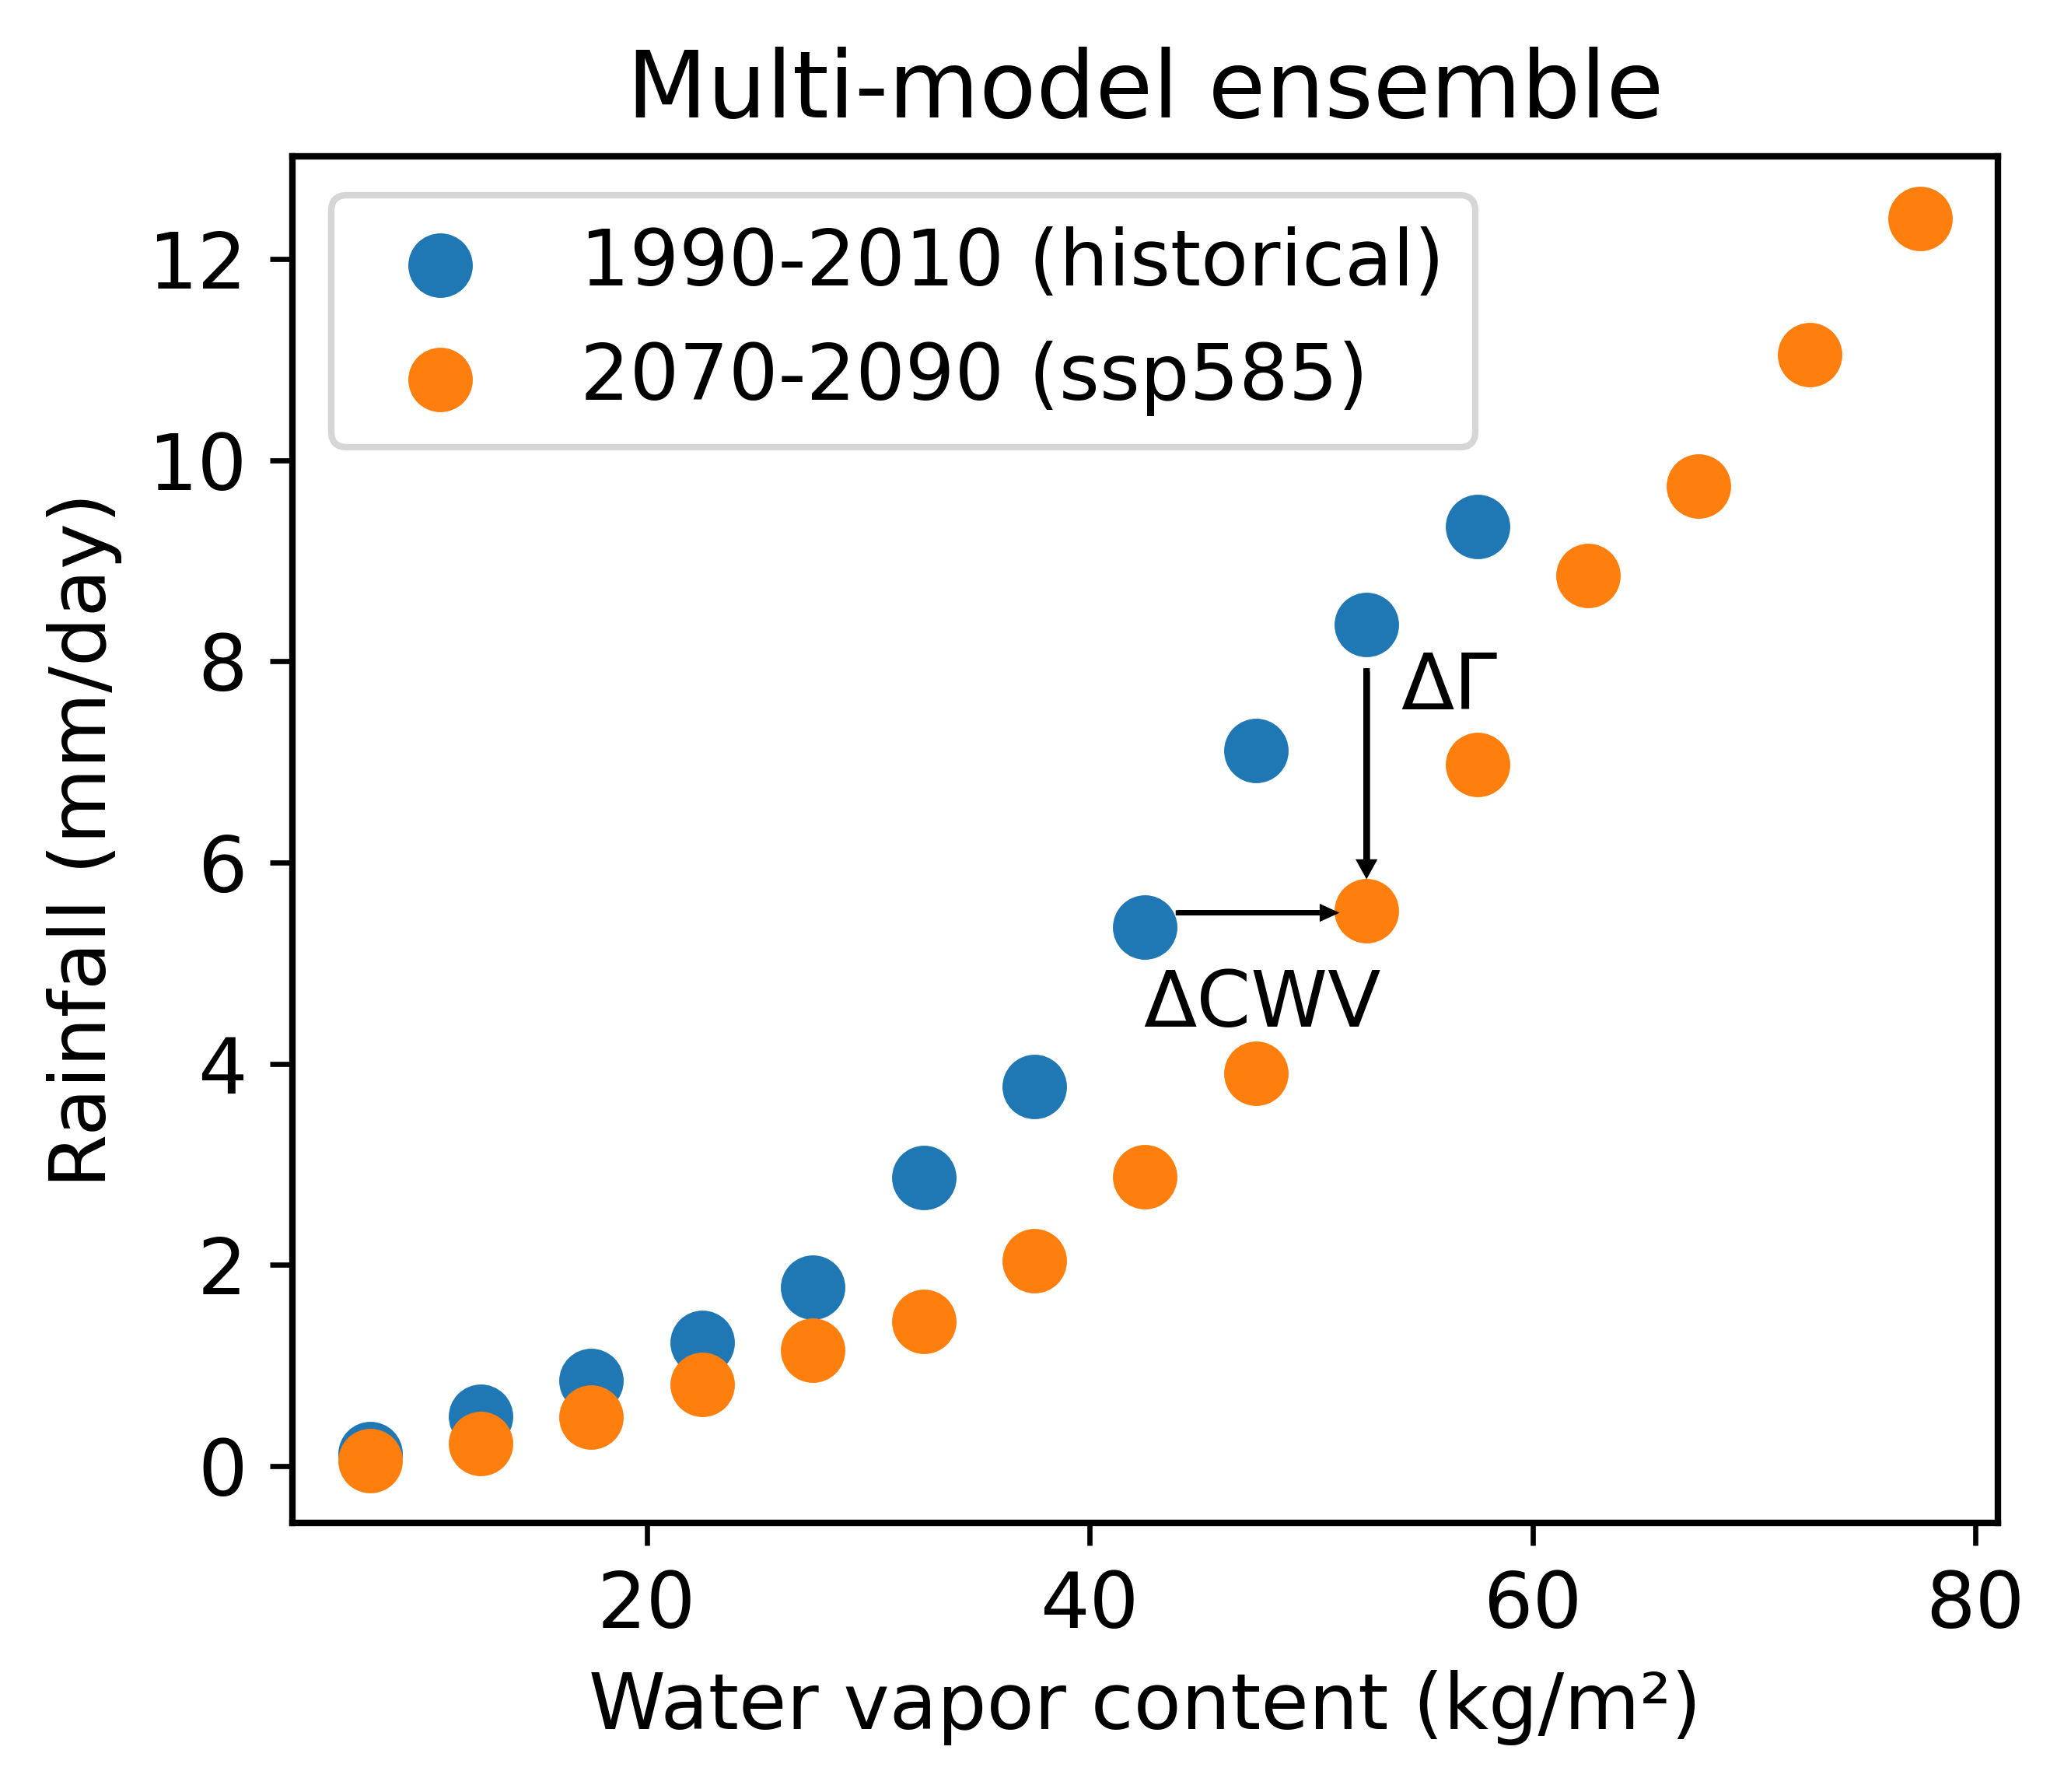

In [124]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [4.6,4]
mpl.rcParams['axes.linewidth'] = 1

plt.scatter(PWAT1, PREC1, s=80)
plt.scatter(PWAT2, PREC2, c='tab:orange', s=80)
plt.xlabel('Water vapor content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('Multi-model ensemble')
plt.legend(['1990-2010 (historical)', '2070-2090 (ssp585)'])
plt.rcParams["figure.autolayout"] = True

#(x and y coordinates of the arrow base,length of the arrow along x and y direction)

plt.arrow(44,5.5,7,0, color='black',
          head_length = 0.5, head_width = 0.1, 
          length_includes_head = True, lw=0.8)

plt.figtext(0.55, 0.43, '\u0394CWV')

plt.arrow(52.5,7.9,0,-2, color='black',
          head_length = 0.1, head_width = 0.5, 
          length_includes_head = True)

plt.figtext(0.67, 0.6, '\u0394\u0393')